# The Processes include
- Getting data ready
- Building a model
- Fitting data to model
- Making Predictions and evaluating a model
- Saving and loading a model
- Putting it all together

In [2]:
import os

import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plot training data, testing data and compare predictions.
    :param train_data:
    :param train_labels:
    :param test_data:
    :param test_labels:
    :param predictions:
    :return:
    """
    plt.figure(figsize=(12, 8))
    plt.scatter(train_data, train_labels, c='b', s=4, label='training data')
    plt.scatter(test_data, test_labels, c='r', s=4, label='testing data')
    if predictions is not None: plt.scatter(test_data, predictions, c='g', s=4, label='predictions')
    plt.legend(prop={'size': 8});

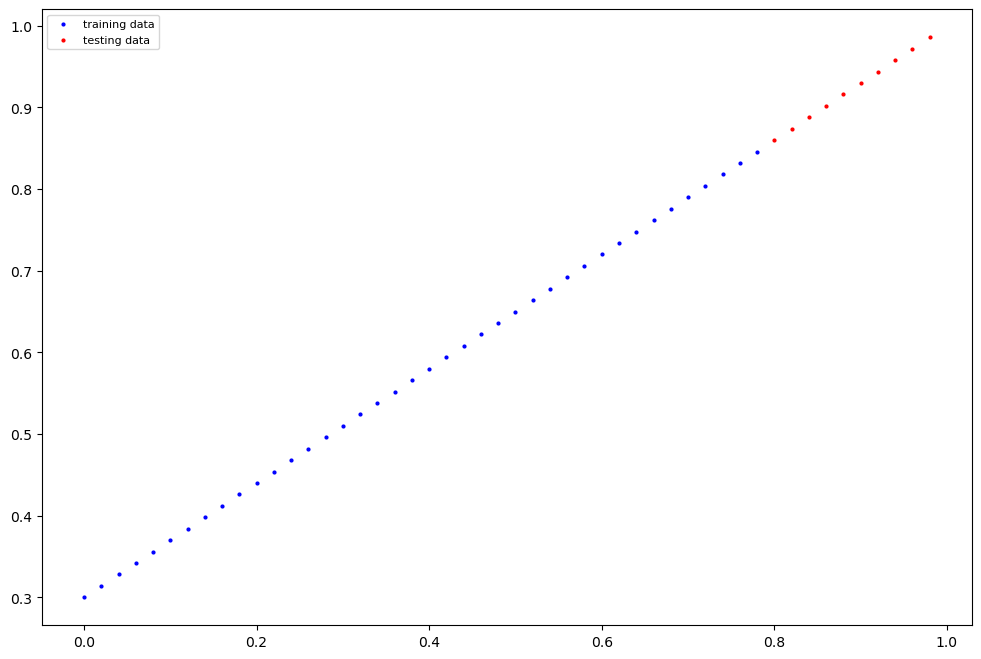

In [8]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building the Model

In [25]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [26]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
with torch.inference_mode():
    y_preds = model_0.forward(X_test)

In [29]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

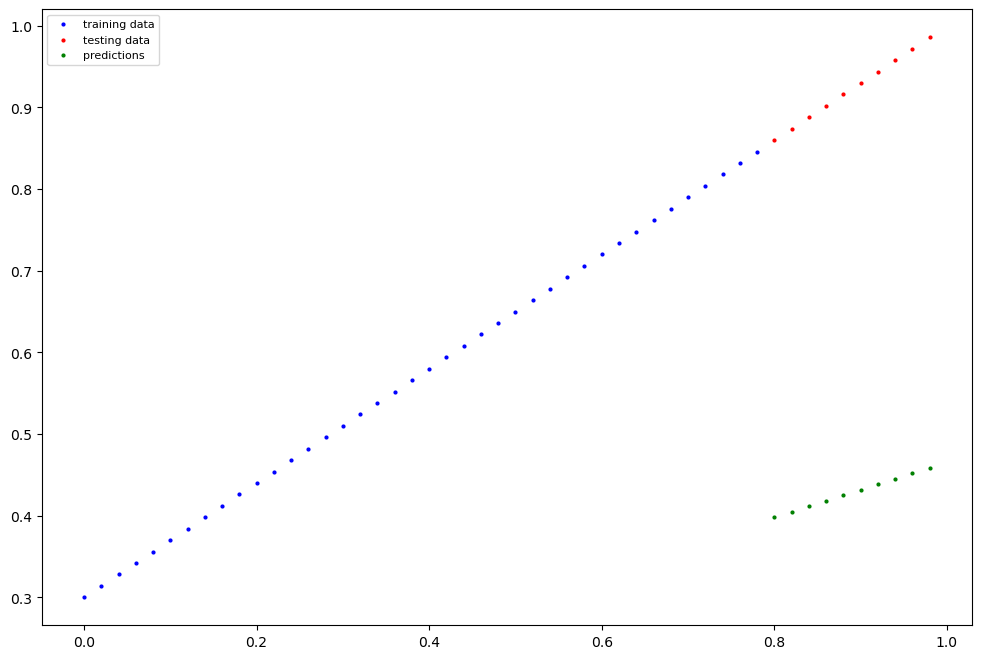

In [30]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

## Training our model

In [31]:
# Loss function
loss_fn = nn.L1Loss()
# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [32]:
# Training and testing loop
torch.manual_seed(42)
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_counts = []
for epoch in range(epochs):
    # Put model in training mode
    model_0.train()
    # 1. Forward Pass the training data using forward()
    y_pred = model_0(X_train)
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad for optimizer
    optimizer.zero_grad()
    # 4. Loss Backwards
    loss.backward()
    # Progress the optimizer
    optimizer.step()

    # Testing mode
    model_0.eval()
    with torch.inference_mode():
        # Forward pass the test data
        test_pred = model_0(X_test)
        # 2. calculate test loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # Predictions come in float data type

        # Print what is happening
        if epoch % 10 == 0:
            epoch_counts.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch}, Train Loss: {loss}, Test Loss: {test_loss}')

Epoch: 0, Train Loss: 0.31288138031959534, Test Loss: 0.48106518387794495
Epoch: 10, Train Loss: 0.1976713240146637, Test Loss: 0.3463551998138428
Epoch: 20, Train Loss: 0.08908725529909134, Test Loss: 0.21729660034179688
Epoch: 30, Train Loss: 0.053148526698350906, Test Loss: 0.14464017748832703
Epoch: 40, Train Loss: 0.04543796554207802, Test Loss: 0.11360953003168106
Epoch: 50, Train Loss: 0.04167863354086876, Test Loss: 0.09919948130846024
Epoch: 60, Train Loss: 0.03818932920694351, Test Loss: 0.08886633068323135
Epoch: 70, Train Loss: 0.03476089984178543, Test Loss: 0.0805937647819519
Epoch: 80, Train Loss: 0.03132382780313492, Test Loss: 0.07232122868299484
Epoch: 90, Train Loss: 0.02788740023970604, Test Loss: 0.06473556160926819


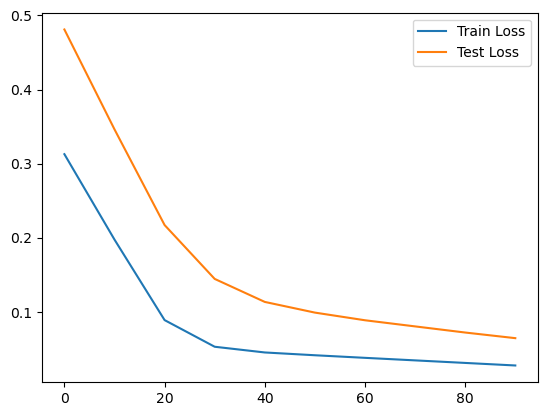

In [33]:
plt.plot(epoch_counts, train_loss_values, label='Train Loss')
plt.plot(epoch_counts, test_loss_values, label='Test Loss')
plt.legend()
plt.show()

In [35]:
# Getting the updated model parameters
print(f'Model Parameters: {model_0.state_dict()}')
print(f'Original Parameters weight: {weight} and bias: {bias}')

Model Parameters: OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})
Original Parameters weight: 0.7 and bias: 0.3


In [36]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

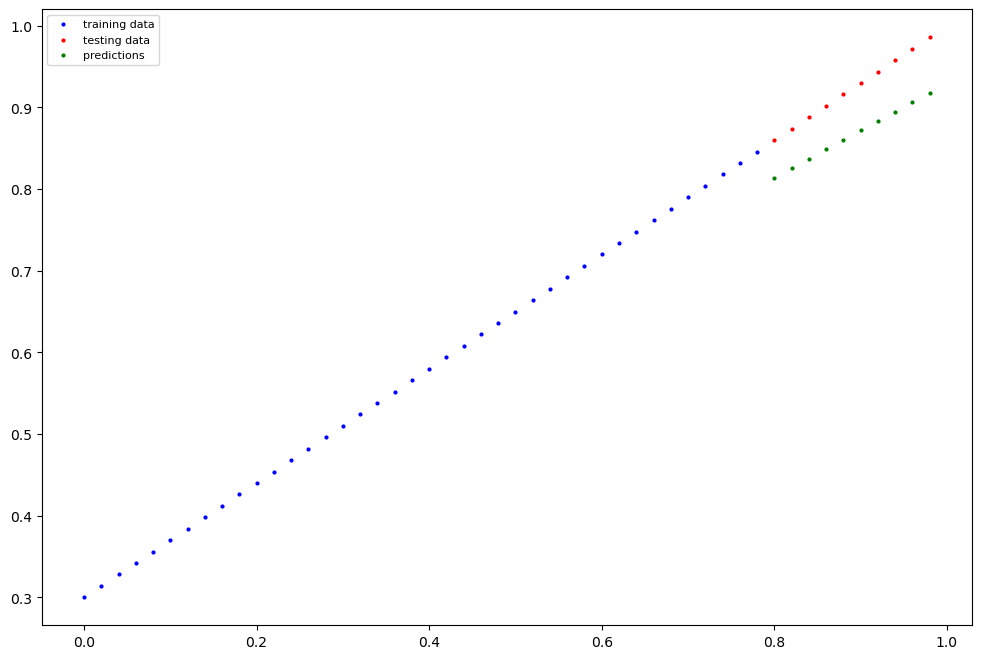

In [37]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

## Saving the model and loading

In [39]:
from pathlib import Path
# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = 'workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/workflow.pth


## Loading the model

In [41]:
# Instantiate new instance of the model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_18313/4120300132.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MOD

<All keys matched successfully>